<a href="https://colab.research.google.com/github/rachelcynthia/DeepLearning-Bootcamp/blob/master/Building_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

Loading Data

In [2]:
from tensorflow.keras.datasets.mnist import load_data
(x_train,y_train) , (x_test,y_test) = load_data()

11493376/11490434 [==============================] - 0s 0us/step


The dataset consists of images

In [3]:
x_train[0].shape

(28, 28)

Each image is 28*28 pixels

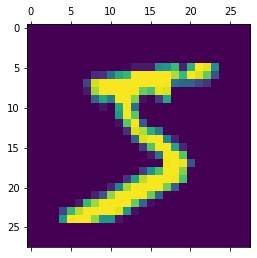

In [6]:
plt.matshow(x_train[0])

In [7]:
y_train[0]

5

Data Preprocessing

In [8]:
# to change pixel to range 0 10 1
x_train = x_train/255
x_test=x_test/255
#255 - is the max number of pixels in RGB

In [9]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

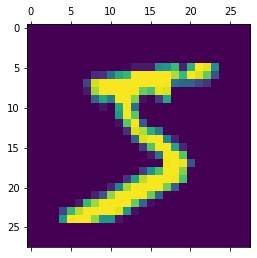

In [10]:
plt.matshow(x_train[0])

Flatten the Data

In [11]:
x_train.shape

(60000, 28, 28)

In [13]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [14]:
x_train_flattened.shape

(60000, 784)

Defining the model

In [17]:
model = tf.keras.Sequential([tf.keras.layers.Dense(10,input_shape=(x_train_flattened.shape[1],), activation='sigmoid')])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


Compiling the model

In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Fit the model

In [20]:
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4879 - accuracy: 0.8781
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3059 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2856 - accuracy: 0.9215
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2751 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2679 - accuracy: 0.9260


Evaluate the model

In [21]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 858us/step - loss: 0.2645 - accuracy: 0.9276


[0.26453399658203125, 0.9276000261306763]

Predict for x_test

In [23]:
y_predicted = model.predict(x_test_flattened)
y_predicted[0] # gives the probability of that number being each digit, the one with max prob is the answer

array([1.6799337e-05, 9.8808454e-11, 2.9401232e-05, 8.8316500e-03,
       1.2407845e-06, 8.5398729e-05, 1.3931841e-09, 7.4499524e-01,
       6.7150264e-05, 9.4774365e-04], dtype=float32)

In [24]:
# to get the max element in the array
np.argmax(y_predicted[0])

7

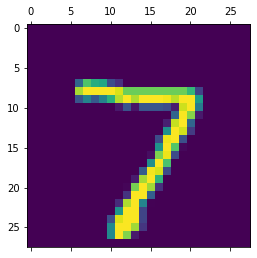

In [25]:
# Checking if its correct
plt.matshow(x_test[0])

Building Neural Network model using hidden layer

In [27]:
model = tf.keras.Sequential([tf.keras.layers.Dense(100,input_shape=(784,),activation='relu'),
                             tf.keras.layers.Dense(100,input_shape=(100,), activation='relu'),
                             tf.keras.layers.Dense(10,activation='sigmoid')])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


Compile and Fit the model

In [28]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened,y_train,batch_size=128, epochs=5)

Epoch 1/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3718 - accuracy: 0.8967
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1483 - accuracy: 0.9574
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1053 - accuracy: 0.9694
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0827 - accuracy: 0.9756
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0660 - accuracy: 0.9803


Evaluate the model

In [29]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0884 - accuracy: 0.9719


[0.08838891983032227, 0.9718999862670898]

We are getting 97.18% accuracy , which is better than the previous model